<a href="https://colab.research.google.com/github/enggisabrilla/Prediksi-Tiket-Pesawat-Domestik-Menggunakan-Regresi-Linear-Berganda/blob/main/Program%20Regresi%20Linear%20Berganda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn

In [ ]:
pip install openpyxl

# Import Library

In [ ]:
# Load library/package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statmodels
import statsmodels
import statsmodels.api as sm

# Data Loading

In [ ]:
# Link Google Sheets dengan format CSV
url = 'https://docs.google.com/spreadsheets/d/1TbTrMIXlly3jCYTD3B8rrX5D-0mOl--sfwJxXiHJ3Q0/export?format=csv'

# Membaca data dari Google Sheets
data = pd.read_csv(url)

# Menampilkan 5 baris pertama
print(data.head())


     maskapai waktu_keberangkatan keberangkatan waktu_kedatangan kedatangan  \
0    Lion Air               15:50           SUB            17:20        CGK   
1    Citilink               21:30           SUB            23:10        CGK   
2    Citilink               18:10           SUB            19:45        CGK   
3    Citilink               20:15           SUB            21:50        CGK   
4  Pelita Air               19:55           SUB            21:30        CGK   

   lama_perjalanan (jam.mnt)  bagasi      harga jenis_penerbangan  
0                       1.30      20    891.000          Langsung  
1                       1.40      15    895.331          Langsung  
2                       1.35      15    950.831          Langsung  
3                       1.35      15    950.831          Langsung  
4                       1.35      20  1.032.966          Langsung  


In [ ]:
data

,maskapai,waktu_keberangkatan,keberangkatan,waktu_kedatangan,kedatangan,lama_perjalanan (jam.mnt),bagasi,harga,jenis_penerbangan
0,Lion Air,15:50,SUB,17:20,CGK,1.30,20,891.000,Langsung
1,Citilink,21:30,SUB,23:10,CGK,1.40,15,895.331,Langsung
2,Citilink,18:10,SUB,19:45,CGK,1.35,15,950.831,Langsung
3,Citilink,20:15,SUB,21:50,CGK,1.35,15,950.831,Langsung
4,Pelita Air,19:55,SUB,21:30,CGK,1.35,20,1.032.966,Langsung
...,...,...,...,...,...,...,...,...,...
3768,Garuda Indonesia,10:00,SUB,13:20,CGK,27.20,40,16.683.676,1 stop
3769,Garuda Indonesia,7:05,SUB,13:15,CGK,6.10,40,18.467.765,1 stop
3770,Garuda Indonesia,7:05,SUB,16:55,CGK,9.50,40,18.467.765,1 stop
3771,Garuda Indonesia,7:05,SUB,18:05,CGK,11.00,40,18.467.765,1 stop


In [ ]:
data.shape

(3773, 9)

# Exploratory Data Analysis (EDA) & Data Preprocessing

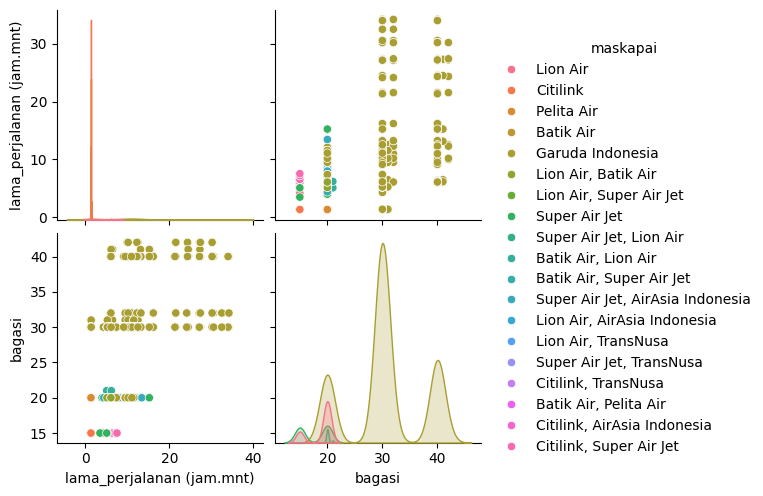

In [ ]:
sns.pairplot(data, hue='maskapai')

<ipython-input-8-a183c0bcb692>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], order=data[col].value_counts().index, palette='Set2')  # Menambahkan palette warna


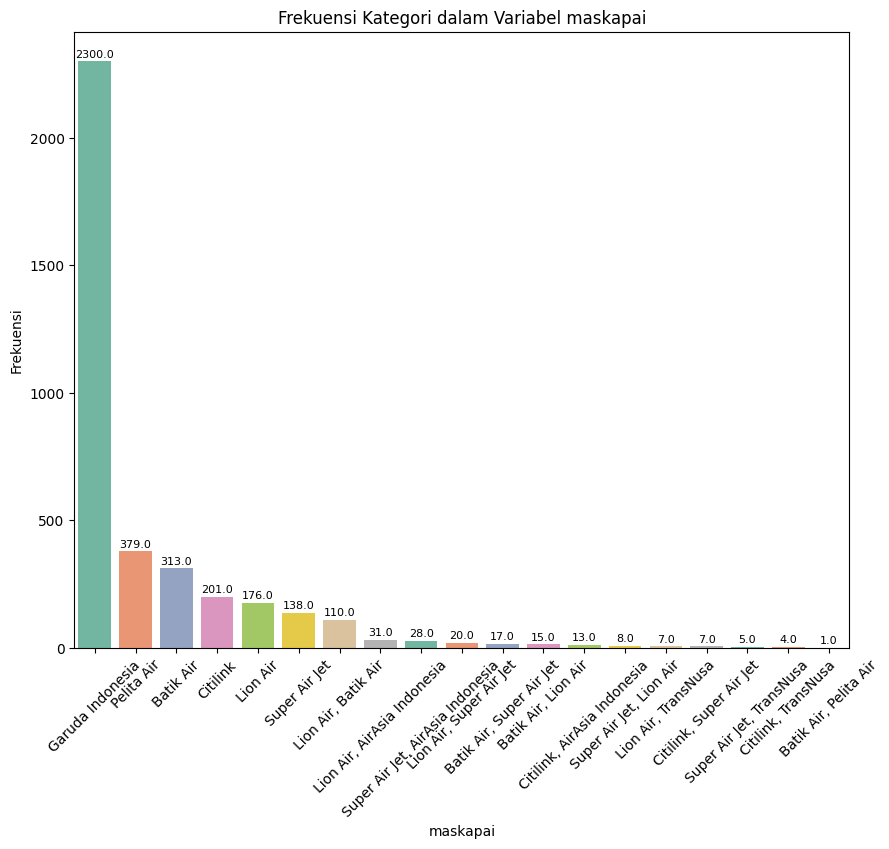

<ipython-input-8-a183c0bcb692>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], order=data[col].value_counts().index, palette='Set2')  # Menambahkan palette warna


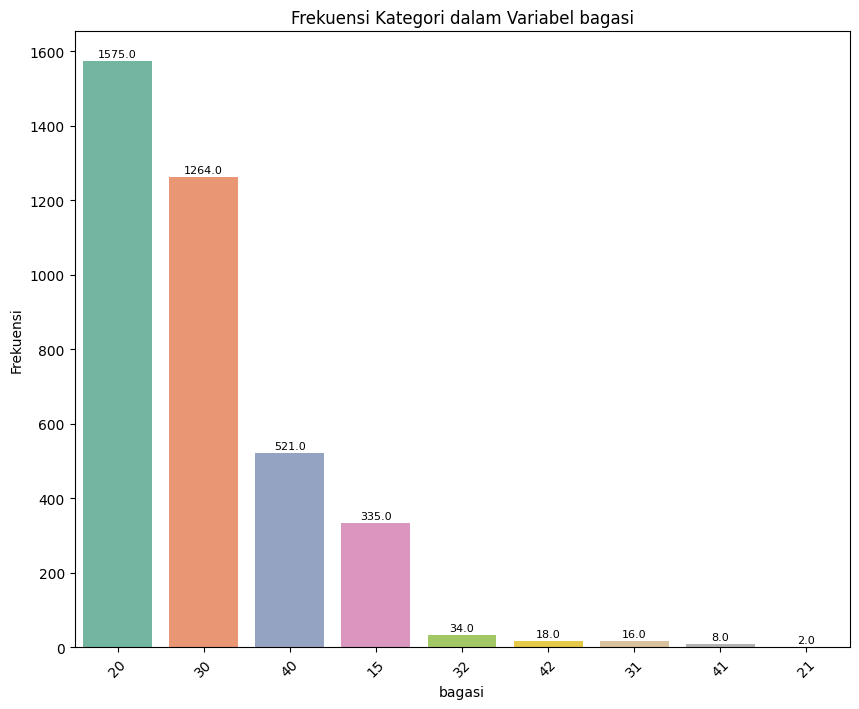

<ipython-input-8-a183c0bcb692>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], order=data[col].value_counts().index, palette='Set2')  # Menambahkan palette warna


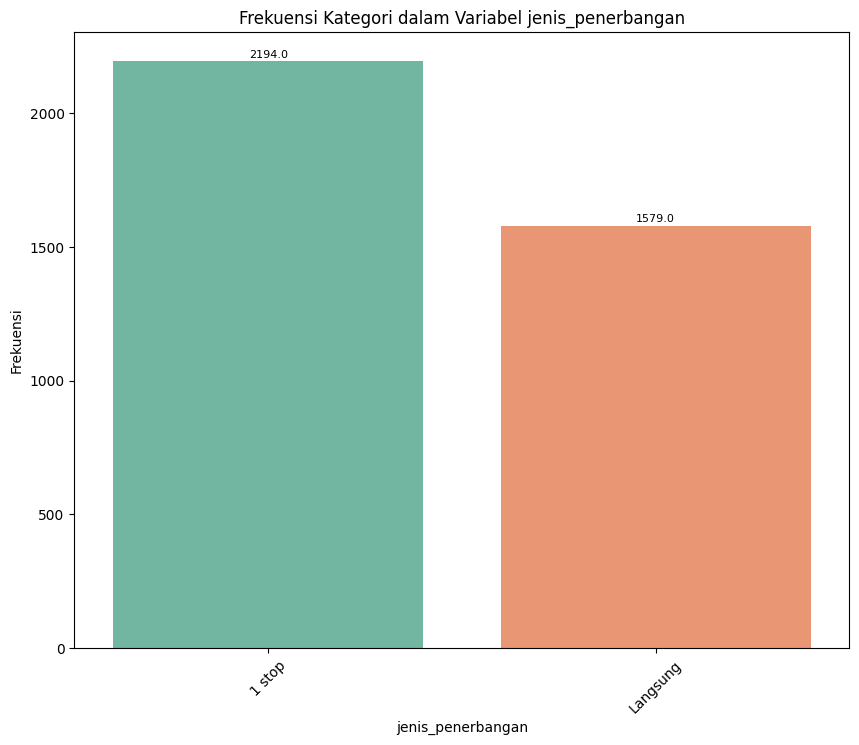

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analisis Data Eksploratori (EDA)
# Membuat barplot/grafik untuk variabel kategorikal
categorical_cols = ['maskapai', 'lama_perjalanan', 'bagasi', 'jenis_penerbangan']
for col in categorical_cols:
    if col in data.columns:
        plt.figure(figsize=(10, 8))  # Ukuran lebih kecil
        ax = sns.countplot(x=data[col], order=data[col].value_counts().index, palette='Set2')  # Menambahkan palette warna
        ax.tick_params(axis='x', labelrotation=45)  # Rotasi label kategori
        plt.title(f"Frekuensi Kategori dalam Variabel {col}")
        plt.xlabel(f"{col}")
        plt.ylabel("Frekuensi")
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                        textcoords='offset points')
        plt.show()


In [ ]:
# Mendapatkan informasi dari data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   maskapai                   3773 non-null   object 
 1   waktu_keberangkatan        3773 non-null   object 
 2   keberangkatan              3773 non-null   object 
 3   waktu_kedatangan           3773 non-null   object 
 4   kedatangan                 3773 non-null   object 
 5   lama_perjalanan (jam.mnt)  3773 non-null   float64
 6   bagasi                     3773 non-null   int64  
 7   harga                      3773 non-null   object 
 8   jenis_penerbangan          3773 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 265.4+ KB


In [ ]:
data.describe()

,lama_perjalanan (jam.mnt),bagasi
count,3773.000000,3773.000000
mean,8.433223,25.972701
std,8.614994,7.768765
min,1.250000,15.000000
25%,1.350000,20.000000
50%,6.000000,20.000000
75%,12.300000,30.000000
max,34.200000,42.000000


In [ ]:
data

,maskapai,waktu_keberangkatan,keberangkatan,waktu_kedatangan,kedatangan,lama_perjalanan (jam.mnt),bagasi,harga,jenis_penerbangan
0,Lion Air,15:50,SUB,17:20,CGK,1.30,20,891.000,Langsung
1,Citilink,21:30,SUB,23:10,CGK,1.40,15,895.331,Langsung
2,Citilink,18:10,SUB,19:45,CGK,1.35,15,950.831,Langsung
3,Citilink,20:15,SUB,21:50,CGK,1.35,15,950.831,Langsung
4,Pelita Air,19:55,SUB,21:30,CGK,1.35,20,1.032.966,Langsung
...,...,...,...,...,...,...,...,...,...
3768,Garuda Indonesia,10:00,SUB,13:20,CGK,27.20,40,16.683.676,1 stop
3769,Garuda Indonesia,7:05,SUB,13:15,CGK,6.10,40,18.467.765,1 stop
3770,Garuda Indonesia,7:05,SUB,16:55,CGK,9.50,40,18.467.765,1 stop
3771,Garuda Indonesia,7:05,SUB,18:05,CGK,11.00,40,18.467.765,1 stop


In [ ]:
# Mengonversi kolom harga menjadi integer
data['harga'] = data['harga'].str.replace('.', '', regex=False).astype(float).astype(int)

# Tampilkan beberapa baris pertama untuk memverifikasi perubahan
data.head()

,maskapai,waktu_keberangkatan,keberangkatan,waktu_kedatangan,kedatangan,lama_perjalanan (jam.mnt),bagasi,harga,jenis_penerbangan
0,Lion Air,15:50,SUB,17:20,CGK,1.30,20,891000,Langsung
1,Citilink,21:30,SUB,23:10,CGK,1.40,15,895331,Langsung
2,Citilink,18:10,SUB,19:45,CGK,1.35,15,950831,Langsung
3,Citilink,20:15,SUB,21:50,CGK,1.35,15,950831,Langsung
4,Pelita Air,19:55,SUB,21:30,CGK,1.35,20,1032966,Langsung


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   maskapai                   3773 non-null   object 
 1   waktu_keberangkatan        3773 non-null   object 
 2   keberangkatan              3773 non-null   object 
 3   waktu_kedatangan           3773 non-null   object 
 4   kedatangan                 3773 non-null   object 
 5   lama_perjalanan (jam.mnt)  3773 non-null   float64
 6   bagasi                     3773 non-null   int64  
 7   harga                      3773 non-null   int64  
 8   jenis_penerbangan          3773 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 265.4+ KB


## Missing Value

In [ ]:
# Mengecek jumlah null di setiap kolom
data.isnull().sum()

,0
maskapai,0
waktu_keberangkatan,0
keberangkatan,0
waktu_kedatangan,0
kedatangan,0
lama_perjalanan (jam.mnt),0
bagasi,0
harga,0
jenis_penerbangan,0


# Asumsi Analisis Regresi

Uji Asumsi klasik adalah analisis yang dilakukan untuk menilai apakah di dalam sebuah model regresi linear Ordinary Least Square (OLS) terdapat masalah-masalah asumsi klasik.

## Uji Normalitas

Uji Normalitas adalah uji statistik yang dilakukan untuk mengetahui bagaimana sebaran sebuah data.

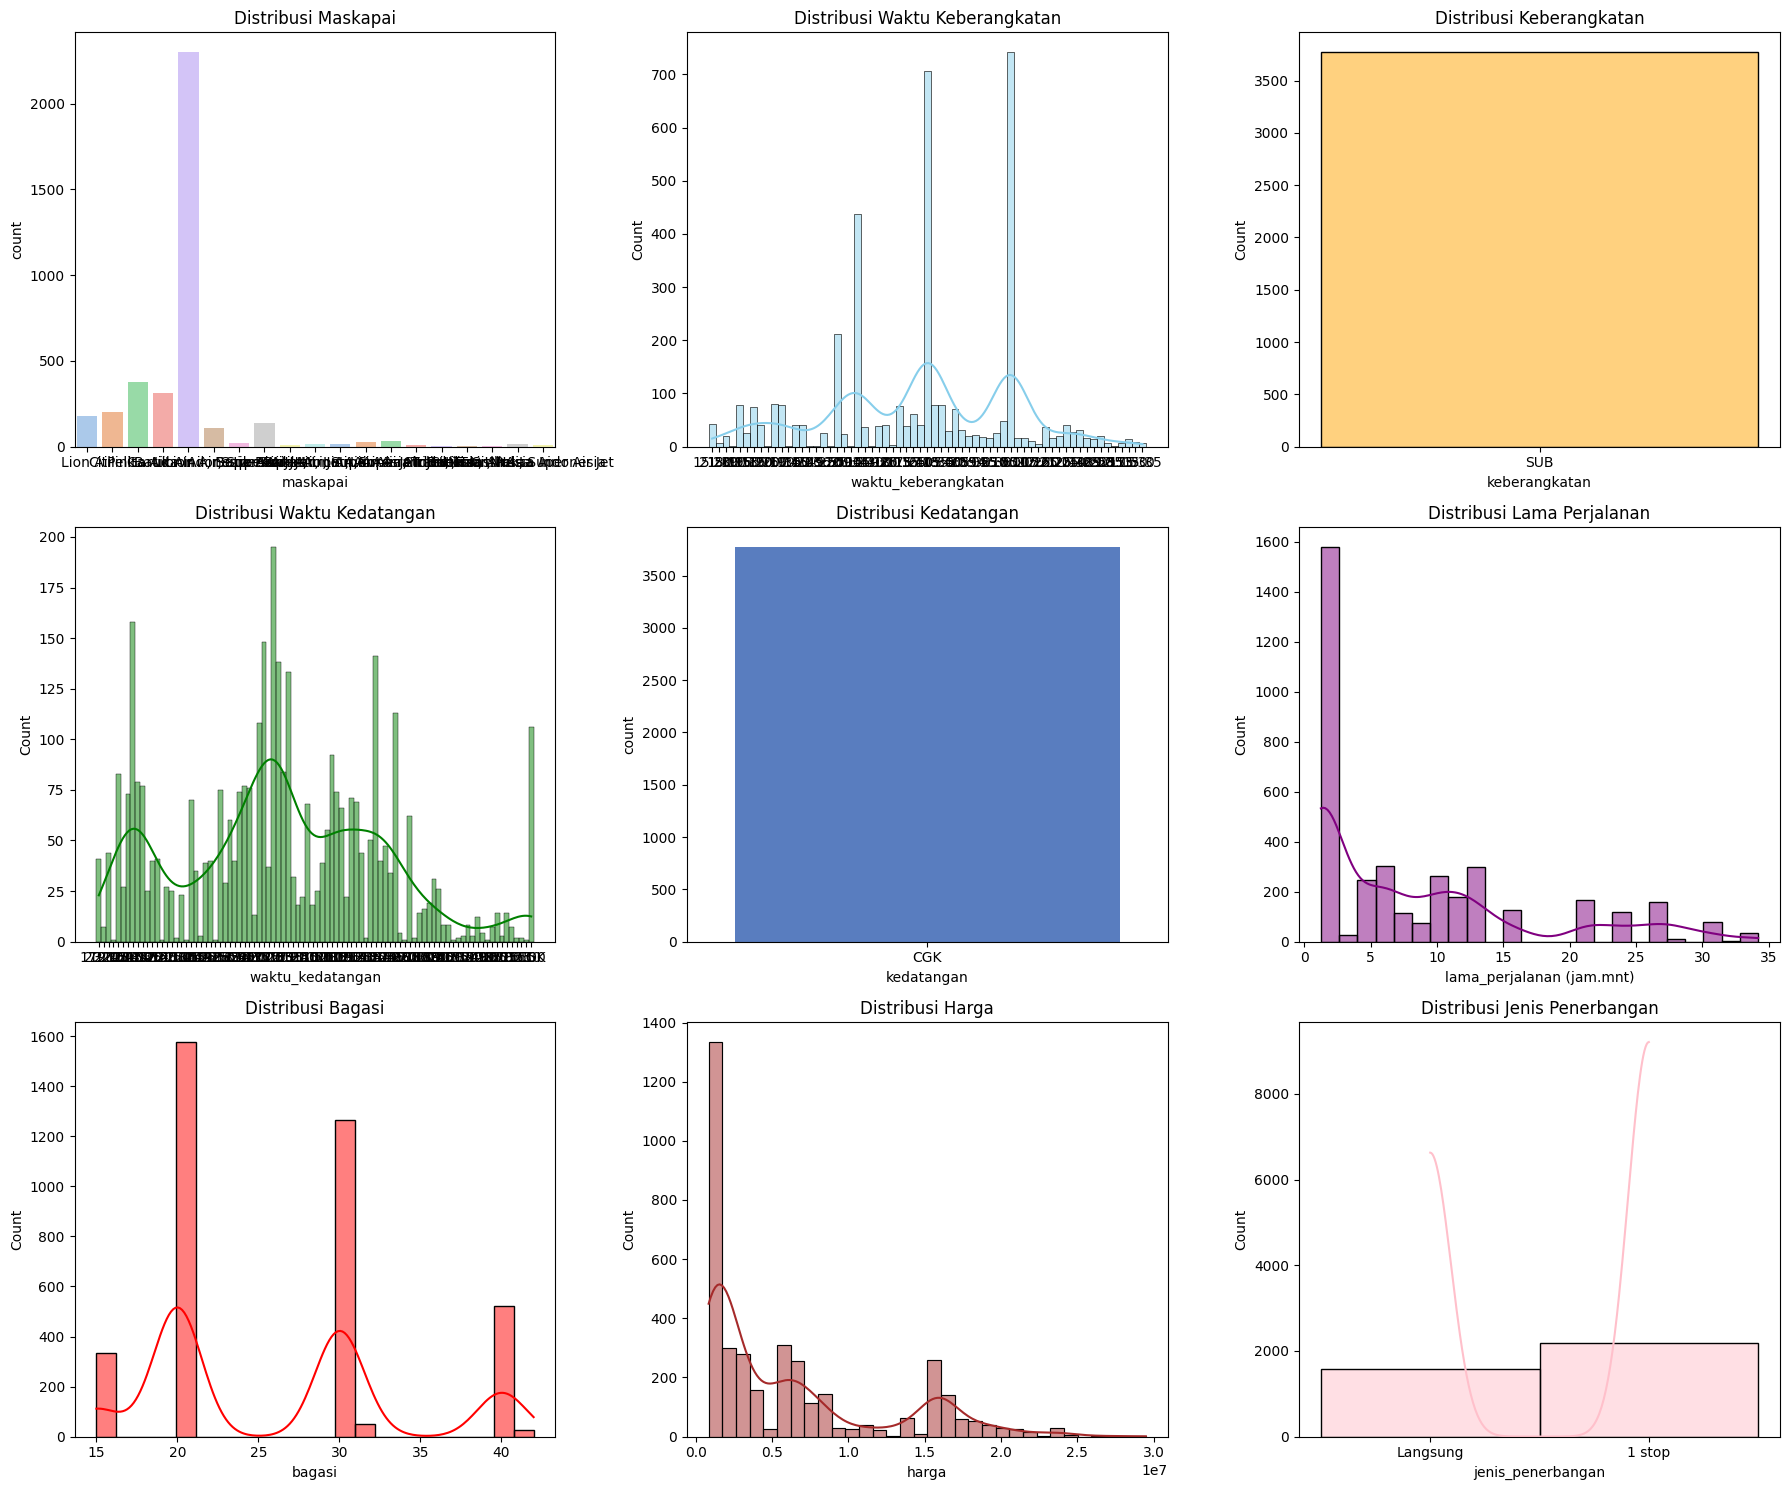

In [ ]:
# Cek normalitas data dengan histogram

# Mengabaikan warning
warnings.filterwarnings('ignore')

# Membuat plot
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Membuat histogram berwarna
sns.countplot(x="maskapai", data=data, ax=axes[0, 0], palette="pastel")
axes[0, 0].set_title("Distribusi Maskapai")

sns.histplot(data["waktu_keberangkatan"], ax=axes[0, 1], kde=True, color="skyblue")
axes[0, 1].set_title("Distribusi Waktu Keberangkatan")

sns.histplot(data["keberangkatan"], ax=axes[0, 2], kde=True, color="orange")
axes[0, 2].set_title("Distribusi Keberangkatan")

sns.histplot(data["waktu_kedatangan"], ax=axes[1, 0], kde=True, color="green")
axes[1, 0].set_title("Distribusi Waktu Kedatangan")

sns.countplot(x="kedatangan", data=data, ax=axes[1, 1], palette="muted")
axes[1, 1].set_title("Distribusi Kedatangan")

sns.histplot(data["lama_perjalanan (jam.mnt)"], ax=axes[1, 2], kde=True, color="purple")
axes[1, 2].set_title("Distribusi Lama Perjalanan")

sns.histplot(data["bagasi"], ax=axes[2, 0], kde=True, color="red")
axes[2, 0].set_title("Distribusi Bagasi")

sns.histplot(data["harga"], ax=axes[2, 1], kde=True, color="brown")
axes[2, 1].set_title("Distribusi Harga")

sns.histplot(data["jenis_penerbangan"], ax=axes[2, 2], kde=True, color="pink")
axes[2, 2].set_title("Distribusi Jenis Penerbangan")

# Mengatur tata letak
plt.tight_layout()
plt.show()

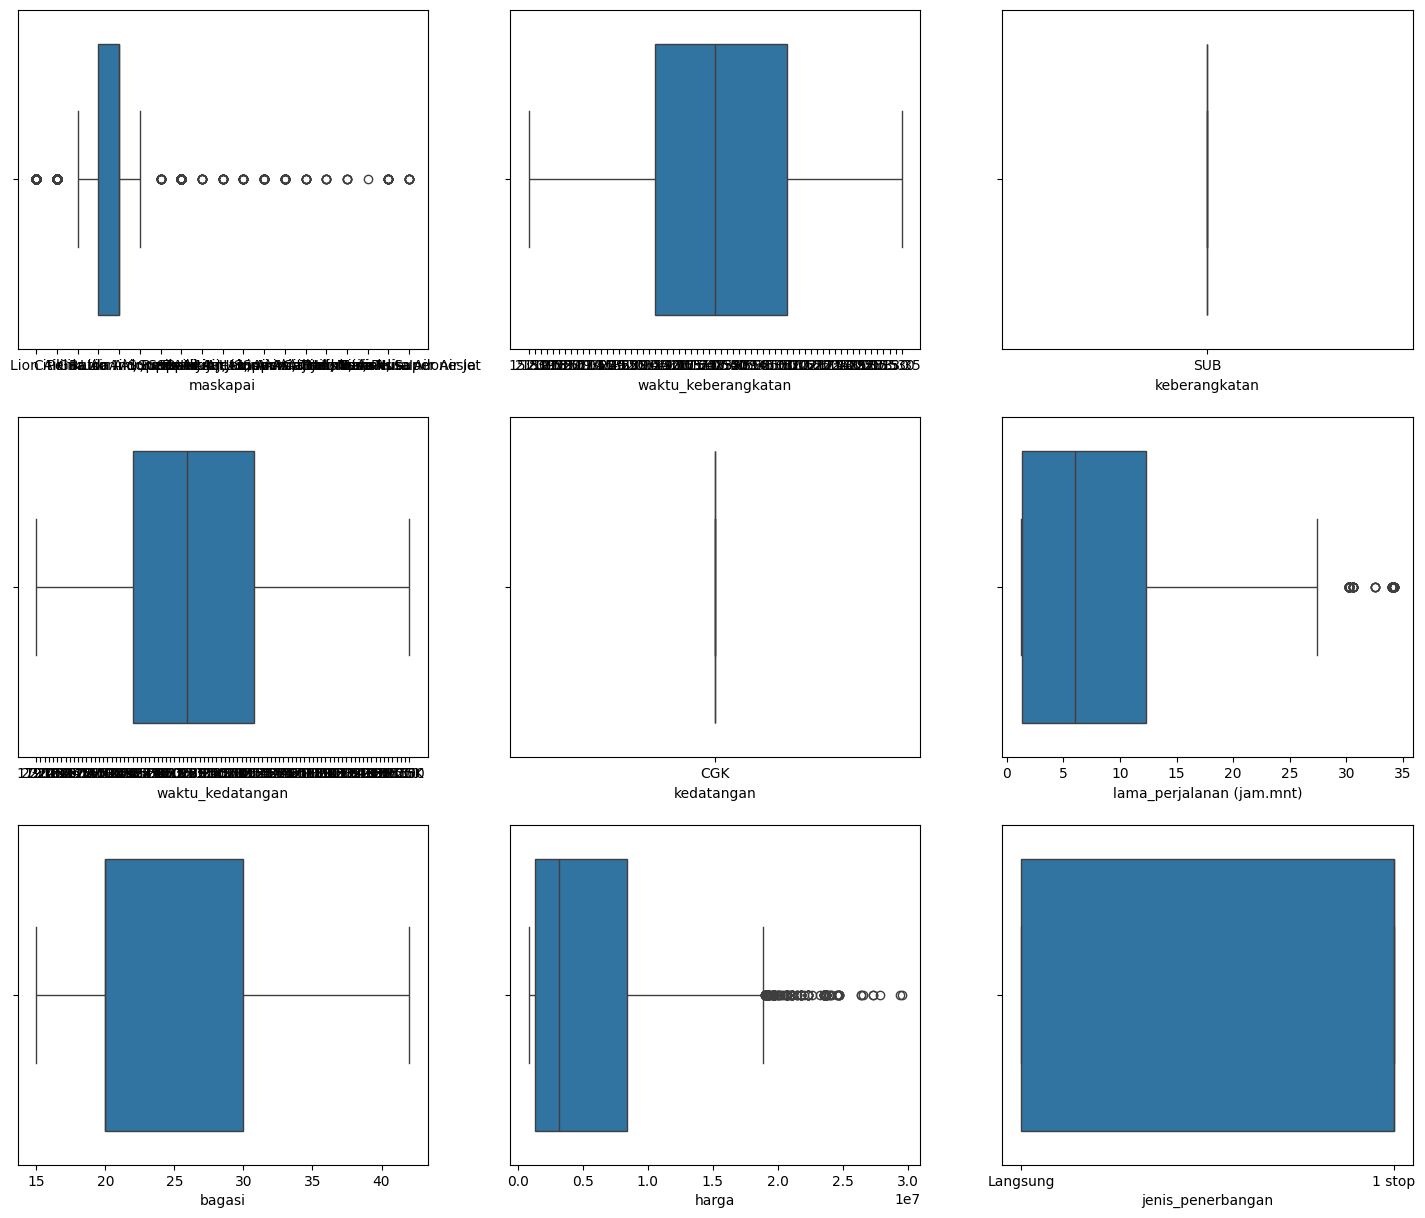

In [ ]:
# Cek normalitas data dengan boxplot
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

sns.boxplot(x="maskapai", data=data, ax=axes[0, 0])
sns.boxplot(x="waktu_keberangkatan", data=data, ax=axes[0, 1])
sns.boxplot(x="keberangkatan", data=data, ax=axes[0, 2])
sns.boxplot(x="waktu_kedatangan", data=data, ax=axes[1, 0])
sns.boxplot(x="kedatangan", data=data, ax=axes[1, 1])
sns.boxplot(x="lama_perjalanan (jam.mnt)", data=data, ax=axes[1, 2])
sns.boxplot(x="bagasi", data=data, ax=axes[2, 0])
sns.boxplot(x="harga", data=data, ax=axes[2, 1])
sns.boxplot(x="jenis_penerbangan", data=data, ax=axes[2, 2])

plt.show()

**Syarat Distribusi Normal**

Distribusi data disebut normal jika memenuhi beberapa syarat berikut:

1. **Bentuk Bell-Shaped**: Distribusi data membentuk kurva lonceng yang simetris di sekitar nilai tengah.
2. **Mean, Median, dan Modus Berimpit**: Rata-rata, nilai tengah, dan nilai yang paling sering muncul berada pada titik yang sama.
3. **Skewness (Kecondongan)**: Nilai skewness harus mendekati 0. Jika data terlalu condong ke kiri atau kanan, distribusi tidak normal.
4. **Kurtosis**: Distribusi normal memiliki kurtosis mendekati 3 (mesokurtik).
5. **Uji Statistik**: Secara formal, distribusi normal dapat diuji menggunakan uji statistik seperti Shapiro-Wilk atau Kolmogorov-Smirnov.

**Berdasarkan Histogram:**
1. Waktu keberangkatan, waktu kedatangan, lama perjalanan, dan harga terlihat lebih menyerupai distribusi yang tidak normal, karena datanya tidak membentuk pola simetris atau bell-shaped.
2. Variabel seperti bagasi mungkin lebih mendekati distribusi normal, meskipun harus dilakukan uji formal untuk memastikannya.

## Uji Linearitas

Uji Linearitas adalah sifat hubungan yang linear antara variabel, artinya setiap perubahan yang terjadi pada satu variabel akan diikuti perubahan dengan besaran yang sejajar pada variabel lainnya.

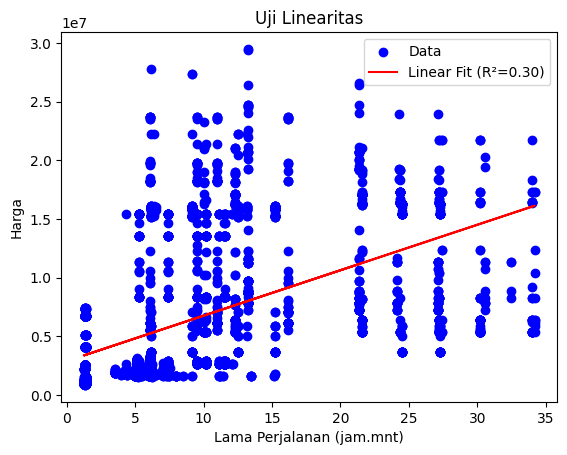

Hasil Uji Linearitas:
Slope: 387511.86
Intercept: 2871719.68
R-squared: 0.30
P-value: 0.0000
Standard Error: 9527.87
Terdapat hubungan linear yang signifikan antara lama perjalanan dan harga.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Contoh DataFrame (ganti dengan data sebenarnya)
data = pd.DataFrame(data)

# Variabel independen (X) dan dependen (Y)
X = data["lama_perjalanan (jam.mnt)"].astype(float)  # Use a numerical column
Y = data["harga"]

# Uji linearitas menggunakan regresi linier
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

# Plot scatter untuk visualisasi
plt.scatter(X, Y, color='blue', label='Data')
plt.plot(X, slope * X + intercept, color='red', label=f'Linear Fit (R²={r_value**2:.2f})')
plt.xlabel("Lama Perjalanan (jam.mnt)")
plt.ylabel("Harga")
plt.title("Uji Linearitas")
plt.legend()
plt.show()

# Menampilkan hasil uji linearitas
print("Hasil Uji Linearitas:")
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error: {std_err:.2f}")

# Interpretasi
if p_value < 0.05:
    print("Terdapat hubungan linear yang signifikan antara lama perjalanan dan harga.")
else:
    print("Tidak terdapat hubungan linear yang signifikan antara lama perjalanan dan harga.")



## Uji Multikolinearitas

Uji multikolinearitas adalah untuk melihat ada atau tidaknya korelasi yang tinggi antara variabel-variabel bebas dalam suatu model regresi linear berganda

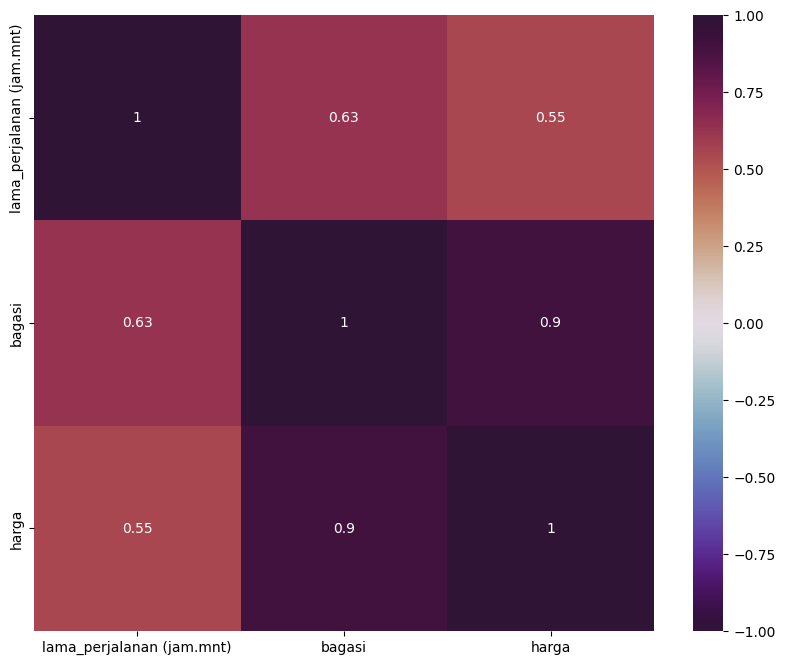

In [ ]:
plt.figure(figsize=(10, 8))

numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), vmax=1, vmin=-1, center=0, cmap="twilight_shifted", annot=True)
plt.show()

**Dari heatmap, terlihat bahwa:**
1. Variabel "bagasi" memiliki korelasi tinggi dengan "harga" (0.9), yang perlu diperhatikan.
2. Korelasi antara "lama_perjalanan (jam.mnt)" dan variabel lainnya lebih rendah (0.63 dengan "bagasi", 0.55 dengan "harga"), sehingga lebih kecil risikonya.

In [ ]:
# Cek Urutan korelasi terendah ke tertinggi
numerical_data = data.select_dtypes(include=np.number)
korelasi = numerical_data.corr()["harga"].sort_values()
korelasi

,harga
lama_perjalanan (jam.mnt),0.552183
bagasi,0.898626
harga,1.000000


Dari hasil diatas dapat disimpulkan :

*   lama_perjalanan (jam.mnt): Nilai korelasi 0.552183 menunjukkan hubungan linier positif yang moderat dengan "harga".
*   bagasi: Nilai korelasi 0.898626 menunjukkan hubungan linier positif yang kuat dengan "harga".
*   harga: Nilai korelasi 1.000000 menunjukkan hubungan sempurna dengan dirinya sendiri (karena ini adalah variabel yang sama).

**Kesimpulan**

1.   Variabel yang paling berpengaruh terhadap harga
      * Dari hasil, bagasi memiliki korelasi tertinggi dengan "harga" (0.898626). Artinya, jumlah bagasi yang diperbolehkan memiliki hubungan paling kuat dengan harga tiket.

2.   Variabel yang berpengaruh sedang
      * Lama perjalanan (jam.mnt) memiliki korelasi sedang dengan "harga" (0.552183), artinya lama perjalanan juga memengaruhi harga, tetapi tidak sekuat jumlah bagasi.





# Scaling

Scaling digunakan untuk merubah skala pada data. Penggunaan scaling dapat membantu mengurangi gap antar kolom dalam data, proses ini tidak merubah distribusi dalam data, hanya melakukan pengubahan skala data.


In [ ]:
# Select only numerical columns for scaling
numerical_features = data.select_dtypes(include=['number']).columns
numerical_data = data[numerical_features]

# Scale the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Create a new DataFrame with scaled numerical features
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features, index=data.index)

# Concatenate scaled numerical features with original categorical features
final_data = pd.concat([data.drop(columns=numerical_features), scaled_df], axis=1)

final_data

,maskapai,waktu_keberangkatan,keberangkatan,waktu_kedatangan,kedatangan,jenis_penerbangan,lama_perjalanan (jam.mnt),bagasi,harga
0,Lion Air,15:50,SUB,17:20,CGK,Langsung,-0.828111,-0.768911,-0.868263
1,Citilink,21:30,SUB,23:10,CGK,Langsung,-0.816501,-1.412600,-0.867547
2,Citilink,18:10,SUB,19:45,CGK,Langsung,-0.822306,-1.412600,-0.858366
3,Citilink,20:15,SUB,21:50,CGK,Langsung,-0.822306,-1.412600,-0.858366
4,Pelita Air,19:55,SUB,21:30,CGK,Langsung,-0.822306,-0.768911,-0.844779
...,...,...,...,...,...,...,...,...,...
3768,Garuda Indonesia,10:00,SUB,13:20,CGK,1 stop,2.178674,1.805842,1.744235
3769,Garuda Indonesia,7:05,SUB,13:15,CGK,1 stop,-0.270869,1.805842,2.039367
3770,Garuda Indonesia,7:05,SUB,16:55,CGK,1 stop,0.123844,1.805842,2.039367
3771,Garuda Indonesia,7:05,SUB,18:05,CGK,1 stop,0.297982,1.805842,2.039367


In [ ]:
# Membuat dataframe dari hasil scalling
scaled_data = pd.DataFrame(scaled_data, columns=numerical_features)
scaled_data

,lama_perjalanan (jam.mnt),bagasi,harga
0,-0.828111,-0.768911,-0.868263
1,-0.816501,-1.412600,-0.867547
2,-0.822306,-1.412600,-0.858366
3,-0.822306,-1.412600,-0.858366
4,-0.822306,-0.768911,-0.844779
...,...,...,...
3768,2.178674,1.805842,1.744235
3769,-0.270869,1.805842,2.039367
3770,0.123844,1.805842,2.039367
3771,0.297982,1.805842,2.039367


In [ ]:
# Select all numerical columns for scaling, including 'waktu_keberangkatan'
numerical_features = data.select_dtypes(include=['number']).columns
numerical_data = data[numerical_features]

# Scale the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Create a new DataFrame with scaled numerical features, including 'waktu_keberangkatan'
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features, index=data.index)

# Concatenate scaled numerical features with original categorical features
final_data = pd.concat([data.drop(columns=numerical_features), scaled_df], axis=1)

final_data

,maskapai,waktu_keberangkatan,keberangkatan,waktu_kedatangan,kedatangan,jenis_penerbangan,lama_perjalanan (jam.mnt),bagasi,harga
0,Lion Air,15:50,SUB,17:20,CGK,Langsung,-0.828111,-0.768911,-0.868263
1,Citilink,21:30,SUB,23:10,CGK,Langsung,-0.816501,-1.412600,-0.867547
2,Citilink,18:10,SUB,19:45,CGK,Langsung,-0.822306,-1.412600,-0.858366
3,Citilink,20:15,SUB,21:50,CGK,Langsung,-0.822306,-1.412600,-0.858366
4,Pelita Air,19:55,SUB,21:30,CGK,Langsung,-0.822306,-0.768911,-0.844779
...,...,...,...,...,...,...,...,...,...
3768,Garuda Indonesia,10:00,SUB,13:20,CGK,1 stop,2.178674,1.805842,1.744235
3769,Garuda Indonesia,7:05,SUB,13:15,CGK,1 stop,-0.270869,1.805842,2.039367
3770,Garuda Indonesia,7:05,SUB,16:55,CGK,1 stop,0.123844,1.805842,2.039367
3771,Garuda Indonesia,7:05,SUB,18:05,CGK,1 stop,0.297982,1.805842,2.039367


In [ ]:
# Convert the NumPy array X to a Pandas DataFrame
X_df = pd.DataFrame(X)

# Now you can use describe on the DataFrame
X_df.describe().T[['min', 'mean', 'std', '50%', 'max']].style.background_gradient(axis=1)

,min,mean,std,50%,max
lama_perjalanan (jam.mnt),1.250000,8.433223,8.614994,6.000000,34.200000


# Membangun Model Regresi

## Train Test Split

In [ ]:
X = scaled_df.drop("harga", axis=1).values
y = scaled_df["harga"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  2641
Ukuran X test  1132
Ukuran y train  2641
Ukuran y test  1132


# Membangun model dengan package Statsmodels

In [ ]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [ ]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [ ]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     5369.
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:58:59   Log-Likelihood:                -1641.1
No. Observations:                2641   AIC:                             3288.
Df Residuals:                    2638   BIC:                             3306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.009      0.713      0.4

Berikut adalah penjelasan dari output regresi Ordinary Least Squares (OLS) yang Anda tampilkan:

---

### 1. **Informasi Umum**
- **Dep. Variable (`y`)**: Variabel dependen atau target yang ingin diprediksi.
- **R-squared (R²)**: 0.803
  - Mengindikasikan bahwa 80.3% variasi pada variabel target dapat dijelaskan oleh model (fitur \(x1\) dan \(x2\)).
  - Nilai R² yang mendekati 1 menunjukkan model cukup baik dalam menjelaskan data.
- **Adj. R-squared**: 0.803
  - R-squared yang telah disesuaikan dengan jumlah fitur (variabel independen) dan data. Nilainya hampir sama dengan R² karena model hanya memiliki sedikit fitur (2 variabel independen).
- **F-statistic**: 5369
  - Ukuran untuk menguji apakah model secara keseluruhan signifikan. Semakin besar nilai ini, semakin baik.
- **Prob (F-statistic)**: 0.00
  - Probabilitas F-statistik. Nilai 0.00 menunjukkan model signifikan secara statistik (ada hubungan antara variabel independen dan dependen).

---

### 2. **Koefisien Model**

#### Penjelasan Kolom:
- **Coef (Koefisien)**:
  - **const**: Intersep model (\(\beta_0\)), yaitu nilai \(y\) ketika \(x1\) dan \(x2\) sama dengan nol.
  - **x1**: Koefisien variabel \(x1\), menunjukkan bahwa setiap peningkatan satu unit pada \(x1\) akan menurunkan \(y\) sebesar 0.0322, dengan asumsi variabel lain tetap.
  - **x2**: Koefisien variabel \(x2\), menunjukkan bahwa setiap peningkatan satu unit pada \(x2\) akan meningkatkan \(y\) sebesar 0.9278, dengan asumsi variabel lain tetap.
- **Std Err (Kesalahan Standar)**: Menunjukkan seberapa besar ketidakpastian estimasi koefisien.
- **t (t-statistik)**: Ukuran untuk menguji apakah koefisien signifikan secara statistik.
  - Nilai absolut t yang besar menunjukkan koefisien signifikan.
- **P>|t| (p-value)**:
  - Probabilitas nilai koefisien terjadi secara kebetulan.
  - **x1**: P-value = 0.004 (< 0.05), signifikan.
  - **x2**: P-value = 0.000 (< 0.05), sangat signifikan.
- **[0.025, 0.975] (Interval Kepercayaan 95%)**:
  - Rentang kemungkinan nilai koefisien sebenarnya.
  - Contoh: Koefisien \(x2\) dengan interval [0.906, 0.950] menunjukkan kepercayaan tinggi pada estimasi \(x2\).

---

### 3. **Uji Normalitas dan Autokorelasi**
- **Omnibus**: Uji statistik untuk memeriksa apakah residual mengikuti distribusi normal.
  - Nilai p-value = 0.000 (< 0.05), menunjukkan residual tidak normal.
- **Durbin-Watson**: Mengukur autokorelasi (hubungan antar residual).
  - Nilai mendekati 2 (yaitu 1.982) menunjukkan tidak ada autokorelasi.
- **Jarque-Bera (JB)**: Tes normalitas residual.
  - P-value = 2.38e-93 (< 0.05), menguatkan bahwa residual tidak normal.

---

### 4. **AIC dan BIC**
- **AIC (Akaike Information Criterion)**: 3288
- **BIC (Bayesian Information Criterion)**: 3306
  - Kedua metrik ini mengukur kualitas model dengan penalti terhadap kompleksitas. Model dengan nilai AIC dan BIC yang lebih rendah lebih baik.

---

### Kesimpulan:
1. Model ini menjelaskan 80.3% variasi data (R-squared = 0.803), yang cukup baik.
2. Koefisien variabel \(x1\) dan \(x2\) signifikan secara statistik (p-value < 0.05), artinya keduanya memiliki hubungan yang bermakna dengan \(y\).
3. Residual tidak sepenuhnya normal (berdasarkan Omnibus dan Jarque-Bera), yang mungkin perlu diperhatikan untuk analisis lanjutan.
4. Model secara keseluruhan signifikan (F-statistic = 5369, p-value = 0.00).

In [ ]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.8027715385094649
adjusted coefficient of determination: 0.8026220097289565
regression coefficients: [ 0.00625208 -0.03216582  0.92784638]


In [ ]:
# membuat list
list_columns = []

for i in data.columns:
  if i != "harga":
    list_columns.append(i)

In [ ]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Get the feature names from scaled_df, excluding 'harga'
list_columns = scaled_df.drop(columns=['harga']).columns.tolist()

# Tampilkan dalam bentuk dataframe
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["Harga Asli"] = y_test
df_statsmod["Harga Prediksi"] = prediction_1
df_statsmod.head()

,lama_perjalanan (jam.mnt),bagasi,Harga Asli,Harga Prediksi
0,2.172870,0.518465,0.765608,0.417416
1,0.901661,1.805842,2.247639,1.652793
2,0.361833,0.518465,0.478508,0.475669
3,-0.822306,-0.768911,-0.760550,-0.680729
4,1.865226,0.518465,-0.410053,0.427311


## Uji Distribusi Residual

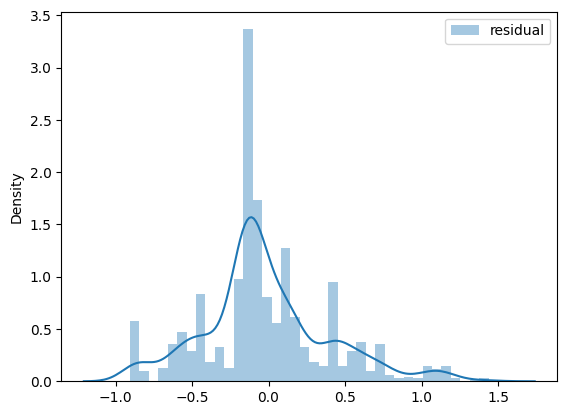

In [ ]:
# Melihat distribusi residual
residual1 = df_statsmod['Harga Asli'] - df_statsmod['Harga Prediksi']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

Kesimpulan
1. Gambar ini menunjukkan bahwa model prediksi harga memiliki kinerja yang cukup baik dengan mayoritas residual dekat dengan nol.
2. Distribusi residual yang mendekati simetris dan terpusat di sekitar nol menunjukkan bahwa model memprediksi tanpa bias yang signifikan.
3. Namun, ada beberapa outlier yang mungkin memerlukan analisis lebih lanjut untuk memahami mengapa model gagal memprediksi dengan baik di beberapa kasus.

In [ ]:
# Memasukkan residual kedalam dataframe
df_statsmod["residual"] = residual1
df_statsmod.head()

,lama_perjalanan (jam.mnt),bagasi,Harga Asli,Harga Prediksi,residual
0,2.172870,0.518465,0.765608,0.417416,0.348192
1,0.901661,1.805842,2.247639,1.652793,0.594846
2,0.361833,0.518465,0.478508,0.475669,0.002839
3,-0.822306,-0.768911,-0.760550,-0.680729,-0.079821
4,1.865226,0.518465,-0.410053,0.427311,-0.837365


<function matplotlib.pyplot.show(close=None, block=None)>

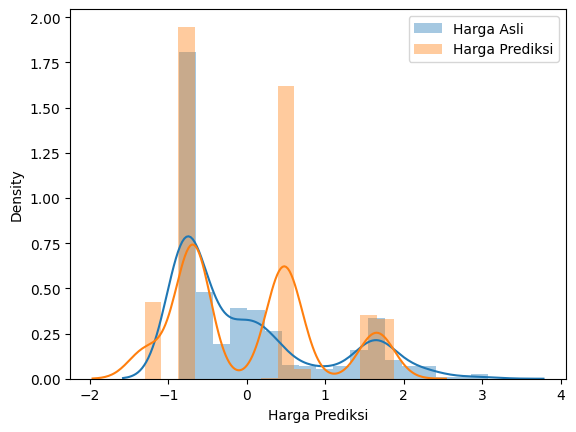

In [ ]:
# Melihat perbedaan actual dan prediksi
sns.distplot(df_statsmod['Harga Asli'], label="Harga Asli")
sns.distplot(df_statsmod['Harga Prediksi'], label="Harga Prediksi")
plt.legend()
plt.show

1. Distribusi "Actual" (Harga Asli):
    * Garis biru mewakili distribusi nilai asli.
    * Distribusi ini menunjukkan bagaimana data harga asli tersebar.

2. Distribusi "Predicted" (Harga Prediksi):
    * Garis oranye mewakili distribusi nilai prediksi dari model.
    * Distribusi ini menunjukkan bagaimana hasil prediksi tersebar.

3. Interpretasi Visualisasi:
    * Kesamaan Distribusi:
      - Semakin mirip kedua distribusi, semakin baik kinerja model dalam memprediksi data.
      - Dari hasil diatas, distribusi prediksi model (oranye) cukup dekat dengan distribusi data asli (biru), yang mengindikasikan model bekerja dengan baik.
    * Perbedaan:
      - Puncak distribusi prediksi lebih tajam dibanding distribusi asli.
      - Terdapat penyimpangan di bagian ekor (di sisi kanan dan kiri), menunjukkan model mungkin kesulitan memprediksi beberapa nilai ekstrem.

**Kesimpulan**
Distribusi Model dan Data Asli:

1. Grafik menunjukkan bahwa prediksi model cukup akurat dalam merepresentasikan distribusi data asli.
2. Namun, terdapat sedikit bias di beberapa area:
    * Puncak distribusi prediksi lebih sempit (kemungkinan overfitting pada nilai tertentu).



## Asumsi No autokorelasi

In [ ]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

1.9823898647478082

Hasil nilai menunjukkan bahwa model regresi memenuhi asumsi tidak ada autokorelasi. Ini berarti residual tersebar secara acak, dan model dapat dianggap valid dari segi asumsi ini.

## Uji Homoskedasitas

Uji Homoskedasitas untuk melihat apakah terdapat ketidaksamaan varians dari residual satu ke pengamatan ke pengamatan yang lain, dari grafik yang dihasilkan dibawah ini, terlihat data berkumpul dalam satu pusat sehingga dapat dikatakan homoskedasitas terpenuhi

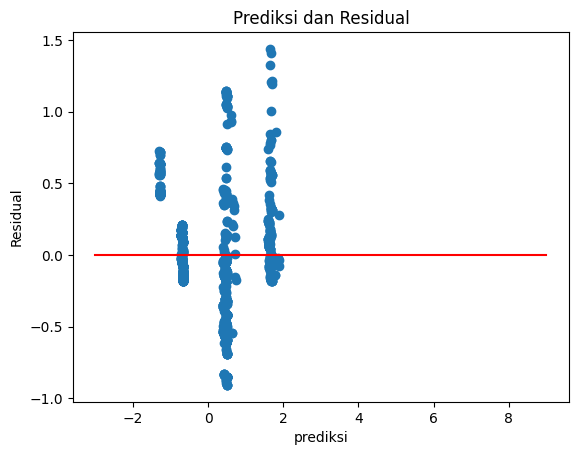

In [ ]:
asm_homosk = plt.scatter(df_statsmod['Harga Prediksi'], df_statsmod["residual"])
plt.xlabel('prediksi')
plt.ylabel('Residual')

asm_homosk = sns.lineplot(x=[-3,9], y=[0,0], color='red')
asm_homosk = plt.title('Prediksi dan Residual')

Grafik menunjukkan bahwa residual tersebar secara acak di sekitar garis horizontal (y=0), tanpa pola tertentu. Hal ini menunjukkan bahwa varian residual tidak berubah secara sistematis terhadap nilai prediksi.

# Evaluasi Model

In [ ]:
from sklearn import linear_model
LR = linear_model.LinearRegression()

LR.fit(X_train, y_train)
print("train score: {:.2f}".format(LR.score(X_train,y_train)))
print("test score: {:.2f}".format(LR.score(X_train,y_train)))
y_pred = LR.predict(X_test)
LR_pred = pd.DataFrame({"y_test": y_test.ravel(), 'y_pred': y_pred.ravel()})


train score: 0.80
test score: 0.80


**RUMUS YANG DIGUNAKAN**

y=β0+β1⋅x1+β2⋅x2+⋯+βn⋅xn

* LR.predict(X_test) digunakan untuk memprediksi output (y) pada data uji (X_test). Prediksi (y) dihitung berdasarkan nilai-nilai x1, x2, ... xn yang ada di (X_test)
* y_test: nilai target yang sebenarnya (data asli).
* y_pred: nilai prediksi yang dihitung oleh model regresi linier.

## Mencari nilai koefisien (b) dan intercept (a)

In [ ]:
# Koefisien (b)

coef_dict ={
    'features': scaled_df.drop(columns=['harga']).columns,  # Use scaled_df or the correct DataFrame name here
    'coef_value': LR.coef_[0]  # Access the coefficients from the trained LR model
}

coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,lama_perjalanan (jam.mnt),-0.032166
1,bagasi,0.927846


In [ ]:
# Intercept (a)
print(LR.intercept_)

[0.00625208]


## Evaluasi Matriks (R2, MSE, MAE)

In [ ]:
# R-square
print('R-square :', metrics.r2_score(df_statsmod['Harga Asli'], df_statsmod['Harga Prediksi']))

# MSE
print('MSE :', metrics.mean_squared_error(df_statsmod['Harga Asli'], df_statsmod['Harga Prediksi']))

# MAE
print('MAE :', metrics.mean_absolute_error(df_statsmod['Harga Asli'], df_statsmod['Harga Prediksi']))

R-square : 0.8194693987956942
MSE : 0.16840606690347165
MAE : 0.3071031317032774


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # Import r2_score, mean_absolute_error, and mean_squared_error

eval_matrices = ['MAE', 'MSE', 'R2 Squared']
models_name = ['Linear Regression']

eval = pd.DataFrame(columns=eval_matrices,
                    index = models_name)

eval.index.name = 'Model'

model_dict = {models_name[0] : LR}

for name, model in model_dict.items():
    eval.loc[name, eval_matrices[2]] = r2_score(y_test, model.predict(X_test)) # Now r2_score is defined
    eval.loc[name, eval_matrices[0]] = mean_absolute_error(y_test, model.predict(X_test))
    eval.loc[name, eval_matrices[1]] = mean_squared_error(y_test, model.predict(X_test))

# Berfungsi untuk menyorot nilai MSE minimum, MAE, dan nilai R2 Squared maksimum dan membuat font menjadi tebal
def highlight_min_max(val):
    style = ''
    if isinstance(val, (int, float)):
        if val == eval['MSE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == eval['MAE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == eval['R2 Squared'].max():
            style += 'background-color: rgba(0, 0, 128, 0.3); color: white; font-weight: bold;'
    return style

styled_eval = eval.style.applymap(highlight_min_max)
styled_eval

,MAE,MSE,R2 Squared
Model,,,
Linear Regression,0.307103,0.168406,0.819469


## Perbandingan Hasil Awal dan Hasil Estimasi

In [ ]:
pred_y_df=pd.DataFrame({'Harga Asli':y_test.ravel(), 'Harga Prediksi':y_pred.ravel(),'Perbedaan':(y_test-y_pred).ravel()})
pred_y_df[0:10]

,Harga Asli,Harga Prediksi,Perbedaan
0,0.765608,0.417416,0.348192
1,2.247639,1.652793,0.594846
2,0.478508,0.475669,0.002839
3,-0.760550,-0.680729,-0.079821
4,-0.410053,0.427311,-0.837365
5,-0.841051,-1.277973,0.436922
6,-0.760550,-0.680729,-0.079821
7,-0.545536,-0.698467,0.152931
8,-0.760550,-0.680729,-0.079821
9,0.092970,0.513758,-0.420788


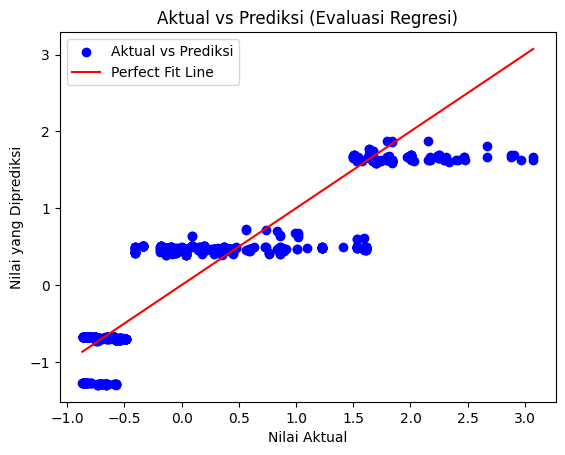

In [ ]:
# Visualisasi hubungan prediksi vs nilai asli
import matplotlib.pyplot as plt
plt.scatter(y_test, prediction_1, color="blue", label="Aktual vs Prediksi")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", label="Perfect Fit Line")
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai yang Diprediksi")
plt.title("Aktual vs Prediksi (Evaluasi Regresi)")
plt.legend()
plt.show()

**Interpretasi Hasil**

* Grafik
    - Titik-titik biru menunjukkan hubungan antara nilai aktual dan prediksi
    - Titik yang mendekati garis merah menunjukkan bahwa prediksi mendekati nilai aktual.
    - Jika banyak titik yang tersebar jauh dari garis merah, itu berarti model memiliki kesalahan prediksi yang lebih besar.


**Kesimpulan**

1. Berdasarkan R² yang tinggi (0.81), MSE yang rendah (0.168), dan distribusi titik scatter yang cukup dekat dengan garis merah, model regresi memiliki performa yang baik.
2. Namun, terdapat beberapa titik yang menyimpang dari garis ideal, menunjukkan bahwa prediksi tidak selalu akurat. Model dapat ditingkatkan dengan melakukan pengoptimalan lebih lanjut (misalnya, menambahkan fitur baru atau mencoba model non-linear).


# Uji Partial Analisis Regresi

**Uji Parameter T-test** memiliki tujuan, apakah variabel independent(X) memberikan pengaruh secara partial terhadap variabel dependent (Y)

In [ ]:
t_test_const, t_test_X1, t_test_X2 = results.tvalues
print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)
print("T-test score X2: ", t_test_X2)

T-test score const:  0.7128875781684869
T-test score X1:  -2.8644285199895068
T-test score X2:  83.19029549501282


In [ ]:
p_value_const, p_value_X1, p_value_X2 = results.pvalues
print("P-value const: ", p_value_const)
print("P-value X1: ", p_value_X1)
print("P-value X2: ", p_value_X2)

P-value const:  0.4759783785323968
P-value X1:  0.004210648481252092
P-value X2:  0.0


**Hasil Uji Parameter T-test**

**a. T-test score:**
  - **T-test score const**: 0.7129
    * Nilai t-test untuk konstanta adalah 0.7129, yang tidak cukup besar untuk menunjukkan bahwa konstanta secara signifikan berbeda dari nol.
  - **T-test score X1**: -2.8644
    * Nilai t-test untuk X1 adalah -2.8644, yang menunjukkan bahwa koefisien X1 signifikan secara statistik karena nilai t-nya lebih besar (in absolute value) dibandingkan dengan nilai t yang lebih kecil (misalnya 2 atau -2 pada tingkat signifikansi 0.05).
  - **T-test score X2**: 83.1903
    * Nilai t-test untuk X2 sangat besar, menunjukkan bahwa koefisien X2 sangat signifikan secara statistik.

**b. P-value:**
  - **P-value const: 0.4760**
    - P-value untuk konstanta adalah 0.4760, yang jauh lebih besar dari 0.05. Ini berarti bahwa konstanta tidak signifikan secara statistik dan kita tidak dapat menolak hipotesis nol (bahwa konstanta sama dengan nol).
  - **P-value X1: 0.0042**
    - P-value untuk X1 adalah 0.0042, yang lebih kecil dari 0.05. Ini menunjukkan bahwa koefisien X1 signifikan secara statistik, dan kita dapat menolak hipotesis nol bahwa koefisien X1 sama dengan nol.
  - **P-value X2: 0.0**
    - P-value untuk X2 sangat kecil (0.0), yang berarti koefisien X2 sangat signifikan secara statistik dan kita dapat menolak hipotesis nol dengan sangat yakin.

**Kesimpulan**
1. Koefisien X1 dan X2 signifikan, karena nilai p-value-nya lebih kecil dari 0.05, menunjukkan bahwa kedua variabel tersebut berkontribusi secara signifikan dalam model regresi.
2. Koefisien konstanta tidak signifikan, karena p-value untuk konstanta lebih besar dari 0.05, yang berarti tidak ada bukti cukup untuk menyatakan bahwa konstanta berpengaruh signifikan dalam model ini.

In [ ]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  5368.675754461524
P-value :  0.0
Tolak H0


**Output yang Dihasilkan**

* f-test score : 5368.6757: Nilai F-test yang sangat besar ini menunjukkan bahwa model regresi secara keseluruhan signifikan. Artinya, ada pengaruh signifikan dari variabel-variabel independen (misalnya, maskapai, waktu pemesanan, dll.) terhadap harga tiket pesawat.

* P-value : 0.0: P-value sangat kecil (0.0), jauh di bawah batas signifikansi 0.05. Ini mengindikasikan bahwa kita dapat menolak hipotesis nol dan menyimpulkan bahwa model regresi ini signifikan secara statistik.

* Tolak H0: Karena p-value lebih kecil dari 0.05, kita menolak hipotesis nol dan menerima hipotesis alternatif yang menyatakan bahwa model regresi ini secara keseluruhan signifikan.



# Kesimpulan

1. Prediksi Harga Tiket Pesawat: Program ini menganalisis data untuk memprediksi harga tiket pesawat domestik pada rute Surabaya-Jakarta menggunakan model regresi linear berganda. Variabel independen dalam model ini bisa mencakup berbagai faktor seperti waktu pemesanan, maskapai, waktu keberangkatan, dll., dan harga tiket pesawat adalah variabel dependen.
2. F-test digunakan untuk menguji apakah kombinasi dari semua faktor-faktor tersebut (misalnya, maskapai penerbangan, waktu pembelian tiket, dll.) secara bersama-sama berpengaruh signifikan terhadap harga tiket. Hasilnya menunjukkan bahwa faktor-faktor tersebut berpengaruh secara signifikan pada harga tiket pesawat domestik.

Dengan hasil ini, model regresi linear berganda dapat digunakan untuk meramalkan harga tiket pesawat berdasarkan variabel-variabel independen yang digunakan dalam analisis.